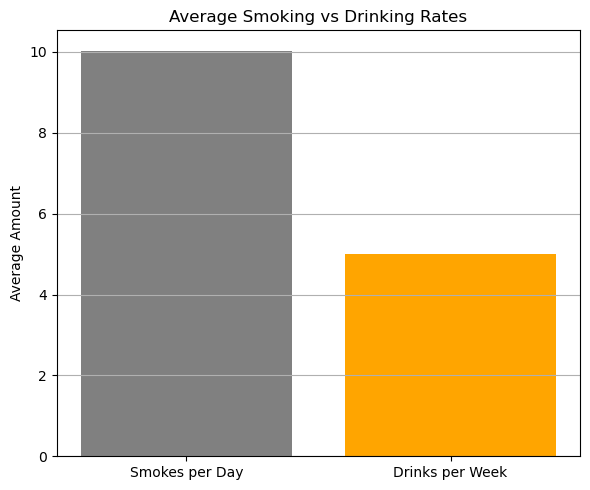

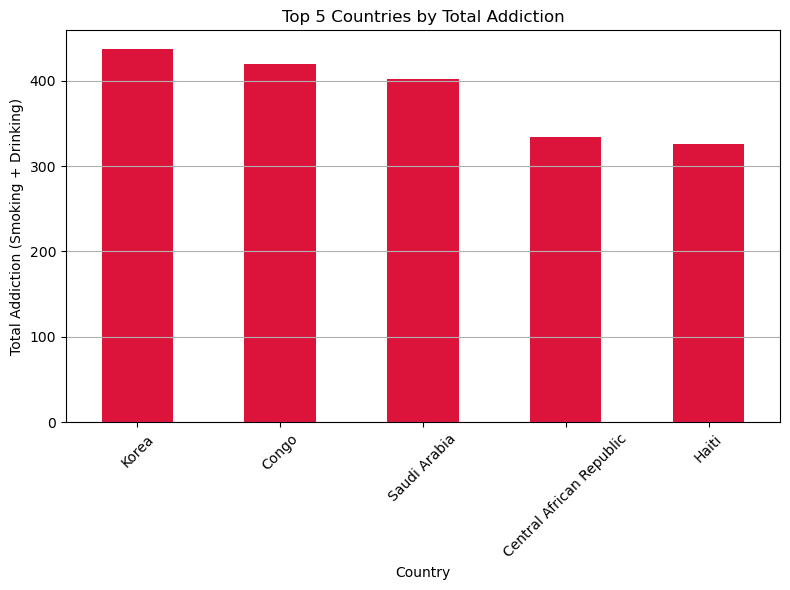

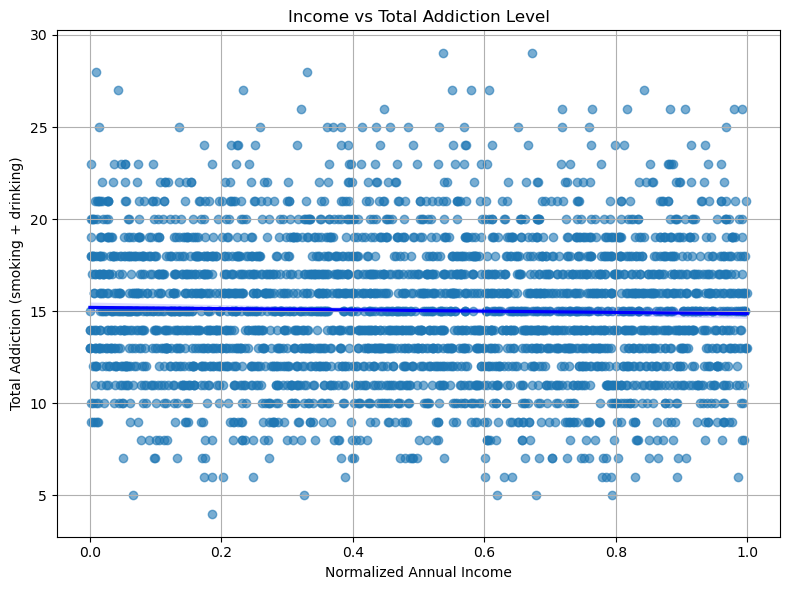

10.034
5.0023333333333335
country
Korea                       437
Congo                       420
Saudi Arabia                402
Central African Republic    334
Haiti                       326
Name: total_addiction, dtype: int64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("addiction_population_data.csv")

# print(df.head())
#print(df.info())

df.fillna({
    'smokes_per_day': 0,
    'drinks_per_week': 0,
    'annual_income_usd': df['annual_income_usd'].mean()
}, inplace=True)

df['total_addiction'] = df['smokes_per_day'] + df['drinks_per_week']

# Objective 1: Compare Average Smoking vs Drinking

avg_smokes = df['smokes_per_day'].mean()
avg_drinks = df['drinks_per_week'].mean()

plt.figure(figsize=(6, 5))
plt.bar(['Smokes per Day', 'Drinks per Week'], [avg_smokes, avg_drinks], color=['gray', 'orange'])
plt.title('Average Smoking vs Drinking Rates')
plt.ylabel('Average Amount')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Objective 2: Top 5 Most Addicted Individuals

country_addiction = df.groupby('country')['total_addiction'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 6))
country_addiction.plot(kind='bar', color='crimson')
plt.title('Top 5 Countries by Total Addiction')
plt.xlabel('Country')
plt.ylabel('Total Addiction (Smoking + Drinking)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Objective 3: Income vs Addiction Level

scaler = MinMaxScaler()
df['normalized_income'] = scaler.fit_transform(df[['annual_income_usd']])

plt.figure(figsize=(8, 6))
sns.regplot(x='normalized_income', y='total_addiction', data=df,
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'blue'})
plt.title('Income vs Total Addiction Level')
plt.xlabel('Normalized Annual Income')
plt.ylabel('Total Addiction (smoking + drinking)')
plt.grid(True)
plt.tight_layout()
plt.show()


print(avg_smokes)
print(avg_drinks)
print(country_addiction)
